# Machine Learning Nanodegree Capstone

## Import libs for EDA and ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## EDA

Load csv in

In [2]:
data = pd.read_csv("./dataset_diabetes/diabetic_data.csv", header=0)

In [3]:
print(data.head(10))

   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                       

In [3]:
data['diag_1'].describe()

count     101766
unique       717
top          428
freq        6862
Name: diag_1, dtype: object

### Column interpretation
- UUIDs: (encounter_id, patient_nbr)
- Patient Demographics: (gender, age, weight)
- Electronic Medical Record data - admits, discharges etc : (admission_type_id, discharge_disposition_id, admission_source_id, payer_code, medical_specialty)
- Time spent in hospital between admit and discharge : time_in_hospital
- Encounter related Statistics : (num_lab_procedures, num_procedures, num_medications)
- Patient visits that year Statistics: (number_outpatient, number_emergency, number_inpatient)
- Diagnosis values : (diag_1, diag_2, diag_3, number_diagnoses)
- Test results : (max_glu_serum, A1Cresult)
- Medication delivery : (metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride pioglitazone, metformin-rosiglitazone, metformin-pioglitazone)
- Medications changed? : (change)
- Diabetes medications prescribed? : (diabetesMed)
- Was patient readmitted? : (readmitted)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
data.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabetesMed', u'readmitted'],
      dtype='object')

In [4]:
# Since we do not require an encounter id or a patient id for this 
# analysis, we can drop them here now.

data.drop("encounter_id", axis=1, inplace=True)
data.drop("patient_nbr", axis=1, inplace=True)

# We will also be dropping the features that have more than 90% of
# the entities with missing values.
data.drop("weight", axis=1, inplace=True)

In [8]:
"""We may be interested in checking to see if there are multiple 
encounters with a single patient, however since we are focusing
on predicting the hospital outcomes of the patient from the
encounter, we can ignore the duplicate patient ids, and hence
all the uuids can be dropped for analysis.
"""

'We may be interested in checking to see if there are multiple \nencounters with a single patient, however since we are focusing\non predicting the hospital outcomes of the patient from the\nencounter, we can ignore the duplicate patient ids, and hence\nall the uuids can be dropped for analysis.\n'

In [9]:
"""What outcome are we most interested in? Readmittance?
"""

'What outcome are we most interested in? Readmittance?\n'

In [5]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

/Users/jaewoopark/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# The list of features can be further split into 3 parts. Mainly
# Demographic, Encounter/Diagnosis, Mediation
features_demographic = list(data.columns[0:3])
features_encounter = list(data.columns[3:15])
features_diagnosis = list(data.columns[15:21])
features_medication = list(data.columns[21:46])
print("----------------------------")
print("Demographic Features")
print("----------------------------")
print(features_demographic)
print("----------------------------")
print("Encounter Features")
print("----------------------------")
print(features_encounter)
print("----------------------------")
print("Diagnosis Features")
print("----------------------------")
print(features_diagnosis)
print("----------------------------")
print("Medication Features")
print("----------------------------")
print(features_medication)

----------------------------
Demographic Features
----------------------------
['race', 'gender', 'age']
----------------------------
Encounter Features
----------------------------
['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
----------------------------
Diagnosis Features
----------------------------
['diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult']
----------------------------
Medication Features
----------------------------
['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', '

In [7]:
"""
Steady - 0
Up - 1
Down - 2
No - 3

Change - 1
No - 0

Yes - 1
No - 0
"""
for feature_name in features_medication[:-2]:
    data[feature_name] = data[feature_name].map({'Steady':0, 'Up':1, 'Down':2, 'No':3})
data['change'] = data['change'].map({'Ch':1, 'No':0})
data['diabetesMed'] = data['diabetesMed'].map({'Yes':1, 'No':0})
data[features_medication].describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.0,101766.0,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.432551,2.956597,2.979728,2.997543,2.853998,2.999971,2.644596,2.705108,2.999322,2.788593,...,3.0,3.0,1.748138,2.979384,2.999617,2.999971,2.999941,2.999971,0.461952,0.770031
std,1.161073,0.353951,0.244372,0.085008,0.637537,0.009404,0.955913,0.877884,0.045096,0.763292,...,0.0,0.0,1.313748,0.247282,0.033905,0.009404,0.013299,0.009404,0.498553,0.420815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,3.0,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,3.0,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000


In [8]:
data['race'] = data['race'].map({'AfricanAmerican':0, 'Asian':1, 'Caucasian':2, 'Hispanic':3, 'Other':4, '?':5})
data['gender'] = data['gender'].map({'Male': 0, 'Female':1, 'Unknown/Invalid':2})
data['age'] = data['age'].map({'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9})

data['max_glu_serum'] = data['max_glu_serum'].map({'Norm':0, '>200':1, '>300':2, 'None':3})
data['A1Cresult'] = data['A1Cresult'].map({'Norm':0, '>7':1, '>8':2, 'None':3})

data['payer_code'] = data['payer_code'].map({'?':0, 'MC':1, 'MD':2, 'HM':3, 'UN':4, 'BC':5, 'SP':6, 'CP':7, 'SI':8, 'DM':9, 'CM':10, 'CH':11, 'PO':12, 'WC':13, 'OT':14, 'OG':15, 'MP':16, 'FR':17})
data['medical_specialty'] = data['medical_specialty'].map({'?':0, 'Pediatrics-Endocrinology':1, 'InternalMedicine':2,
       'Family/GeneralPractice':3, 'Cardiology':4, 'Surgery-General':5,
       'Orthopedics':6, 'Gastroenterology':7,
       'Surgery-Cardiovascular/Thoracic':8, 'Nephrology':9,
       'Orthopedics-Reconstructive':10, 'Psychiatry':11, 'Emergency/Trauma':12,
       'Pulmonology':13, 'Surgery-Neuro':14,
       'Obsterics&Gynecology-GynecologicOnco':15, 'ObstetricsandGynecology':16,
       'Pediatrics':17, 'Hematology/Oncology':18, 'Otolaryngology':19,
       'Surgery-Colon&Rectal':20, 'Pediatrics-CriticalCare':21, 'Endocrinology':22,
       'Urology':23, 'Psychiatry-Child/Adolescent':24, 'Pediatrics-Pulmonology':25,
       'Neurology':26, 'Anesthesiology-Pediatric':27, 'Radiology':28,
       'Pediatrics-Hematology-Oncology':29, 'Psychology':30, 'Podiatry':31,
       'Gynecology':32, 'Oncology':33, 'Pediatrics-Neurology':34, 'Surgery-Plastic':35,
       'Surgery-Thoracic':36, 'Surgery-PlasticwithinHeadandNeck':37,
       'Ophthalmology':38, 'Surgery-Pediatric':39,
       'Pediatrics-EmergencyMedicine':40, 'PhysicalMedicineandRehabilitation':41,
       'InfectiousDiseases':42, 'Anesthesiology':43, 'Rheumatology':44,
       'AllergyandImmunology':45, 'Surgery-Maxillofacial':46,
       'Pediatrics-InfectiousDiseases':47, 'Pediatrics-AllergyandImmunology':48,
       'Dentistry':49, 'Surgeon':50, 'Surgery-Vascular':51, 'Osteopath':52,
       'Psychiatry-Addictive':53, 'Surgery-Cardiovascular':54,
       'PhysicianNotFound':55, 'Hematology':56, 'Proctology':57, 'Obstetrics':58,
       'SurgicalSpecialty':59, 'Radiologist':60, 'Pathology':61, 'Dermatology':62,
       'SportsMedicine':63, 'Speech':64, 'Hospitalist':65, 'OutreachServices':66,
       'Cardiology-Pediatric':67, 'Perinatology':68, 'Neurophysiology':69,
       'Endocrinology-Metabolism':70, 'DCPTEAM':71, 'Resident':72})

data['diag_1'].loc[data['diag_1'].str.contains('V')] = '1000'
data['diag_1'].loc[data['diag_1'].str.contains('E')] = '1001'
data['diag_1'] = data['diag_1'].replace('?', '1002')
data['diag_2'].loc[data['diag_2'].str.contains('V')] = '1000'
data['diag_2'].loc[data['diag_2'].str.contains('E')] = '1001'
data['diag_2'] = data['diag_2'].replace({'?':'1002'})
data['diag_3'].loc[data['diag_3'].str.contains('V')] = '1000'
data['diag_3'].loc[data['diag_3'].str.contains('E')] = '1001'
data['diag_3'] = data['diag_3'].replace('?', '1002')

data['diag_1'] = data['diag_1'].astype(float)
data['diag_2'] = data['diag_2'].astype(float)
data['diag_3'] = data['diag_3'].astype(float)

/Users/jaewoopark/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
# Squash the readmitted column into a binary value

data['readmitted'] = data['readmitted'].map({'>30':1, '<30':1, 'NO':0})
data['readmitted'].describe()

count    101766.000000
mean          0.460881
std           0.498470
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: readmitted, dtype: float64

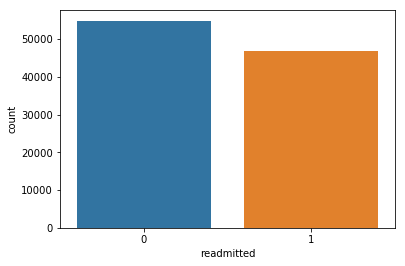

In [16]:
import seaborn as sns
sns.countplot(data['readmitted'], label='Count')

# As we can see, readmission is very common, in fact almost 50%

## Feature Selection

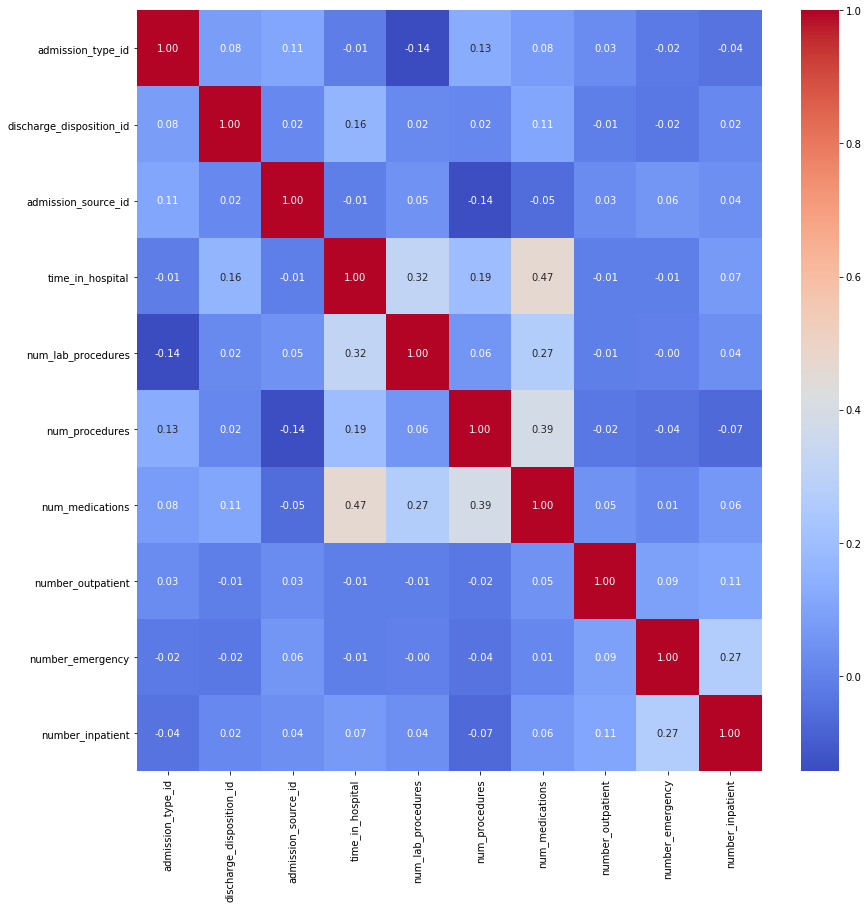

In [15]:
corr = data[features_encounter].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',
            xticklabels= features_encounter,
            yticklabels= features_encounter,
            cmap= 'coolwarm')

# We could likely drop num_lab_procedures, num_procedures, and keep
# time_in_hospital and num_medications, as these two are correlated
# to the other two

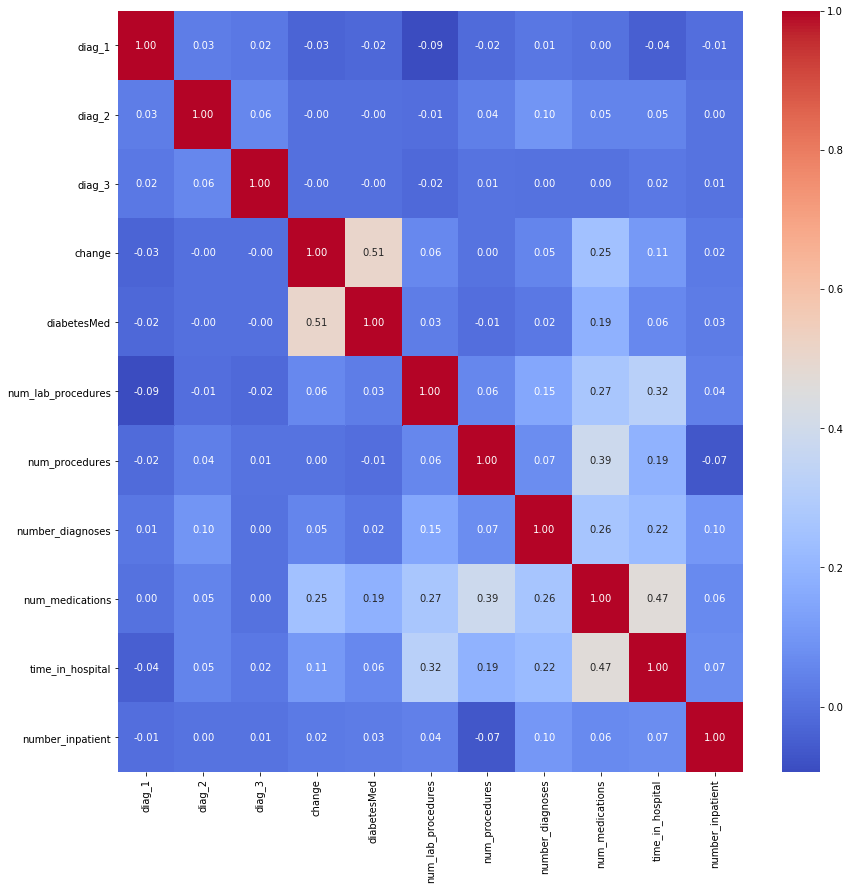

In [111]:
features_of_interest = ['diag_1', 'diag_2', 'diag_3', 'change', 
                        'diabetesMed', 'num_lab_procedures', 
                        'num_procedures', 'number_diagnoses', 
                        'num_medications', 'time_in_hospital', 
                        'number_inpatient']
corr = data[features_of_interest].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',
            xticklabels= features_of_interest,
            yticklabels= features_of_interest,
            cmap= 'coolwarm')

In [16]:
# It seems that not a lot of features are strongly correlated to others
# Change and DiabetesMed were closely correlated at 0.51, and
# num_medications and time_in_hospitals was also strongly correlated
# at 0.47, however, none of them are very highly correlated enough for
# us to use one feature to mostly represent other features.

In [10]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(71236, 47)
(30530, 47)


In [11]:
prediction_variables = train.columns[:-1]
train_x = train[train.columns[:-1]]
train_y = train.readmitted
test_x = test[test.columns[:-1]]
test_y = test.readmitted

In [12]:
model = RandomForestClassifier(n_estimators=100)

In [13]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
prediction=model.predict(test_x)

In [107]:
# Test accuracy for Radom Forest
metrics.accuracy_score(prediction,test_y)

(71236, 48)
(30530, 48)


0.63832296102194563

In [16]:
# Training accuracy for Random Forest
train_pred = model.predict(train_x)
metrics.accuracy_score(train_pred, train_y)

1.0

In [108]:
important_features = pd.Series(model.feature_importances_, index=prediction_variables).sort_values(ascending=False)
print(important_features)

num_lab_procedures          8.658561e-02
diag_1                      8.209451e-02
diag_2                      8.092042e-02
diag_3                      7.836328e-02
num_medications             7.574316e-02
time_in_hospital            5.455196e-02
number_inpatient            5.127274e-02
age                         4.537879e-02
medical_specialty           4.149264e-02
discharge_disposition_id    4.132554e-02
payer_code                  3.918975e-02
number_diagnoses            3.848261e-02
num_procedures              3.601688e-02
admission_type_id           2.405851e-02
insulin                     2.284576e-02
race                        2.149137e-02
admission_source_id         2.088669e-02
number_outpatient           1.766555e-02
gender                      1.736758e-02
A1Cresult                   1.695342e-02
number_emergency            1.509621e-02
metformin                   1.272883e-02
change                      1.164827e-02
glipizide                   1.101985e-02
glyburide       

In [48]:
# Test accuracy for SVM
model = svm.SVC()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
metrics.accuracy_score(prediction,test_y)

0.63236161152964299

In [17]:
# Training accuracy for SVM
model = svm.SVC()
model.fit(train_x, train_y)
train_pred = model.predict(train_x)
metrics.accuracy_score(train_pred,train_y)

0.99393565051378518

In [113]:
# Test accuracy for LR
model = LogisticRegression(C=1.0)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
metrics.accuracy_score(prediction, test_y)

0.61929249918113327

In [18]:
# Training accuracy for LR
model = LogisticRegression(C=1.0)
model.fit(train_x,train_y)
train_pred=model.predict(train_x)
metrics.accuracy_score(train_pred, train_y)

0.61877421528440679

In [13]:
short_list_features = ['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3',
                       'num_medications', 'time_in_hospital',
                       'number_inpatient', 'age', 'medical_specialty', 
                       'discharge_disposition_id', 'payer_code', 
                       'number_diagnoses', 'num_procedures', 
                       'admission_type_id', 'insulin', 'race', 
                       'admission_source_id', 'number_outpatient', 'gender',
                       'A1Cresult', 'number_emergency', 'metformin', 'change',
                       'glipizide', 'glyburide']
train_x = train[short_list_features]
train_y = train.readmitted
test_x = test[short_list_features]
test_y = test.readmitted

In [19]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
metrics.accuracy_score(prediction,test_y)

0.63616115296429743

In [119]:
model = svm.SVC()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
metrics.accuracy_score(prediction,test_y)

# it seems like SVM suffers heavily from trimming the number of
# features down to focus more on the important ones.

0.53907631837536851

In [120]:
model = LogisticRegression(C=1.0)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
metrics.accuracy_score(prediction, test_y)

0.6181133311496888

In [ ]:
# It seems like the 3 methods that were attempted, LogisticReg,
# RandomForest, and SVM are close to each other in terms of
# accuracy as a metric when all the features were used.
# Also, by trimming down on the number of features, we don't see too much
# of a plunge in RandomForest and Logistic Regression, however there is 
# a significant drop in the accuracy for SVM.

# Going forward, keeping close to Occam's Razor, we will use Random Forest
# and Logistic Regression for cross validation testing for simplicity
# and paralleled accuracy.

/Users/jaewoopark/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


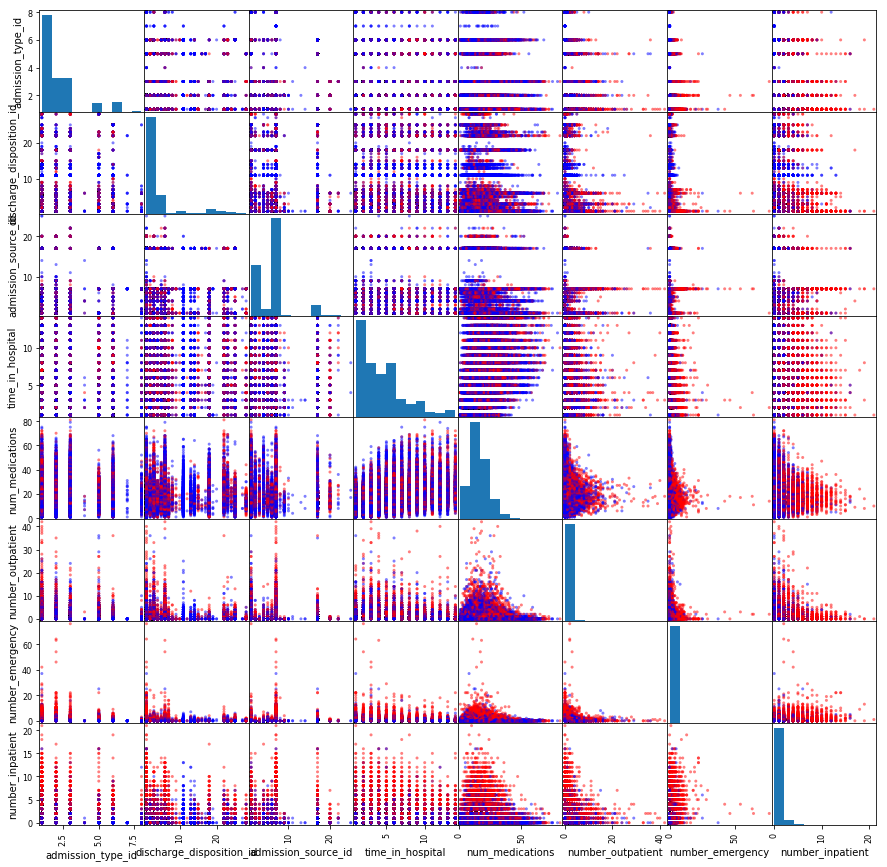

In [32]:
encounter = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means readmitted and blue foo 0 means not readmitted
colors = data["readmitted"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[encounter], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

In [19]:
# It looks like admission_type_id, discharge_disposition, 
# admission_source_id, at the very least do not contribute much
# gain to classify two categories as both are mixed and a separable
# plane is not noticeable
cherry_picked_features = ['num_lab_procedures', 'diag_1', 'diag_2', 'diag_3',
                       'num_medications', 'time_in_hospital',
                       'number_inpatient', 'age', 'medical_specialty', 
                       'payer_code','number_diagnoses', 'num_procedures', 
                       'insulin', 'race', 'number_outpatient', 'gender',
                       'A1Cresult', 'number_emergency', 'metformin', 'change',
                       'glipizide', 'glyburide']
outcome = 'readmitted'

In [21]:
train_x = train[cherry_picked_features]
train_y = train.readmitted
test_x = test[cherry_picked_features]
test_y = test.readmitted

## Crossvalidation and Parameter Tuning

In [21]:
#Cross Validation
def classification(model, data, prediction_features, output):
    model.fit(data[prediction_features], data[output])
    
    prediction = model.predict(data[prediction_features])
    accuracy = metrics.accuracy_score(prediction, data[output])
    print("Accuracy: %s" % "{0: .3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        train_x = (data[prediction_features].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_x, train_y)
        
        test_x = data[prediction_features].iloc[test,:]
        test_y = data[output].iloc[test]
        error.append(model.score(test_x, test_y))
        
        print("Cross-Validation Score: %s" % "{0: .3%}".format(
                np.mean(error)))


In [126]:
model = LogisticRegression()
classification(model, test, cherry_picked_features, outcome)

Accuracy:  61.679%
Cross-Validation Score:  59.693%
Cross-Validation Score:  61.449%
Cross-Validation Score:  59.745%
Cross-Validation Score:  60.240%
Cross-Validation Score:  61.024%


In [127]:
model = RandomForestClassifier(n_estimators=100)
classification(model, test, cherry_picked_features, outcome)

Accuracy:  100.000%
Cross-Validation Score:  60.686%
Cross-Validation Score:  61.699%
Cross-Validation Score:  60.491%
Cross-Validation Score:  60.998%
Cross-Validation Score:  61.113%


In [15]:
# on to grid search

def classification_gridsearchCV(model, parameter_grid, data_x, data_y):
    clf = GridSearchCV(model, parameter_grid, cv=5, scoring="accuracy", n_jobs=2)
    
    clf.fit(data_x, data_y)
    print("The best set of parameters: ")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator: ")
    print(clf.best_estimator_)
    print("The best score: ")
    print(clf.best_score_)
    
data_x = data[cherry_picked_features]
data_y = data['readmitted']

In [16]:
param_grid = {'max_depth' : [None, 3],
              'max_features' : ['sqrt', 'log2', None],
              'n_estimators' :[10, 50, 100],1
              'min_samples_leaf' : [1, 2, 3]}

model = RandomForestClassifier()
classification_gridsearchCV(model, param_grid, data_x, data_y)

The best set of parameters: 
{'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 3}
the bset estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The best score: 
0.619303107128


In [18]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

model = LogisticRegression()
classification_gridsearchCV(model, param_grid, data_x, data_y)

The best set of parameters: 
{'penalty': 'l2', 'C': 0.01}
the bset estimator: 
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
The best score: 
0.614861545113


In [17]:
param_grid = {'n_estimators' :[100, 150, 200],
              'min_samples_leaf' : [3, 5, 10]}

model = RandomForestClassifier()
classification_gridsearchCV(model, param_grid, data_x, data_y)
# separated from other params due to computation resource issues
# below result is the same as above with n_estimatorand min sample leaf changed
# auto and sqrt is the same for max_features

The best set of parameters: 
{'n_estimators': 150, 'min_samples_leaf': 10}
the bset estimator: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The best score: 
0.623204213588


In [22]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(train_x, train_y)
train_pred = model.predict(train_x)
metrics.accuracy_score(train_pred,train_y)

0.78033578527710712

In [23]:
model = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(train_x, train_y)
train_pred = model.predict(train_x)
metrics.accuracy_score(train_pred,train_y)

0.61623336515245097